Machine Learning Exam

This is a classification task.
The two different machine learning models chosen are Linear SVM and Random forest

In [207]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    precision_recall_curve
)
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

The dataset is loaded and preprocessed

In [208]:

# Load the dataset
data = pd.read_csv('C:/Users/User/Documents/GitHub/ML_exam/ai4i2020.csv')

# Display the first 5 rows of the data
print(data.head())
print(data.info())


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

In [209]:
# Check if there are missing values in the dataset
if data.isnull().values.any():
    print("Missing values found")
else:
    print("No missing values found")

# Preprocess the data
X = data.drop(columns=['UDI', 'Product ID', 'Type', 'Machine failure', 'PWF', 'TWF', 'HDF', 'OSF', 'RNF'])
y = data['Machine failure']
class_distribution = y.value_counts()
print(class_distribution)


No missing values found
Machine failure
0    9661
1     339
Name: count, dtype: int64


There is imbalance in the dataset

Creating a pairplot to visualize relationships between variables

In [210]:

dataplot = data.drop(columns=['UDI', 'Product ID', 'Type', 'PWF', 'TWF', 'HDF', 'OSF', 'RNF'])
#sns.pairplot(dataplot, hue='Machine failure')

As seen in the pairplot, the features are normally distributed

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(dataplot.describe())

       Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean            300.004930               310.005560             1538.776100   
std               2.000259                 1.483734              179.284096   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1503.000000   
75%             301.500000               311.100000             1612.000000   
max             304.500000               313.800000             2886.000000   

        Torque [Nm]  Tool wear [min]  Machine failure  
count  10000.000000     10000.000000     10000.000000  
mean      39.986910       107.951000         0.033900  
std        9.968934        63.654147         0.180981  
min        3.800000         0.000000         0.000000  
25%     

There is a large difference between min and max in some of the features. That calls for standardizing features

In [212]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Initializing the SVM classifier using both linear and rbf kernels to see which one is best

In [213]:
linear_svm = SVC(kernel='linear')
rbf_svm = SVC(kernel='rbf')
poly_svm = SVC(kernel='poly')

Performing k-fold cross-validation 

In [214]:
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [215]:
# Cross-validation for linear kernel
linear_cv_scores = cross_val_score(linear_svm, X_train, y_train, cv=kf)
print(f"Linear Kernel - Cross-validation scores: {linear_cv_scores}")
print(f"Linear Kernel - Mean cross-validation score: {linear_cv_scores.mean()}")

# Cross-validation for RBF kernel
rbf_cv_scores = cross_val_score(rbf_svm, X_train, y_train, cv=kf)
print(f"RBF Kernel - Cross-validation scores: {rbf_cv_scores}")
print(f"RBF Kernel - Mean cross-validation score: {rbf_cv_scores.mean()}")

# Cross-validation for POLY kernel
poly_cv_scores = cross_val_score(poly_svm, X_train, y_train, cv=kf)
print(f"RBF Kernel - Cross-validation scores: {poly_cv_scores}")
print(f"RBF Kernel - Mean cross-validation score: {poly_cv_scores.mean()}")

Linear Kernel - Cross-validation scores: [0.975    0.971875 0.9675   0.9575   0.95875 ]
Linear Kernel - Mean cross-validation score: 0.9661249999999999
RBF Kernel - Cross-validation scores: [0.9775  0.97875 0.97125 0.96625 0.9675 ]
RBF Kernel - Mean cross-validation score: 0.9722500000000001
RBF Kernel - Cross-validation scores: [0.97625  0.979375 0.971875 0.969375 0.969375]
RBF Kernel - Mean cross-validation score: 0.97325


Making gridsearch on all three kernels and found the rbf mean cross-validation score to be better than linear and approx. the same as poly. 
The strategy with an SVM is to try different kernels with different parameter values.
The rbf kernel is more computationally heavy than linear but less than poly.

In [216]:

pipe = make_pipeline(scaler, rbf_svm)
grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [0.01, 0.25, 0.5, 0.75, 1.0]
}

grid_search = GridSearchCV(estimator=pipe, param_grid=grid, cv=kf, verbose=2)
grid_search.fit(X, y) # Train the model with different parameters
grid_search.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.1s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.1s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.1s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.1s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.1s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.1s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.1s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.1s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.1s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.1s
[CV] END .........................svc__C=0.1, svc__gamma=0.5; total time=   0.2s
[CV] END .........................svc__C=0.1, s

0.9808

In [217]:
grid_search.best_params_

{'svc__C': 100, 'svc__gamma': 0.25}

The best parameters are tested with the rbf kernel to be C=100 and gamma = 0.25.
Now training the SVM with the rbf kernel with the best parameters on the entire dataset and evaluating it on the test set.

In [218]:
rbf_svm = SVC(kernel='rbf', C=100, gamma=0.25)
rbf_svm.fit(X_train, y_train)

SVC(C=100, gamma=0.25)

Now for the prediction

In [219]:
y_pred = rbf_svm.predict(X_test)

And the evaluation

Accuracy: 0.983
Precision: 0.8148148148148148
Recall: 0.6470588235294118
F1 Score: 0.7213114754098361
ROC AUC: 0.8209414200462793
Confusion Matrix:
[[1922   10]
 [  24   44]]


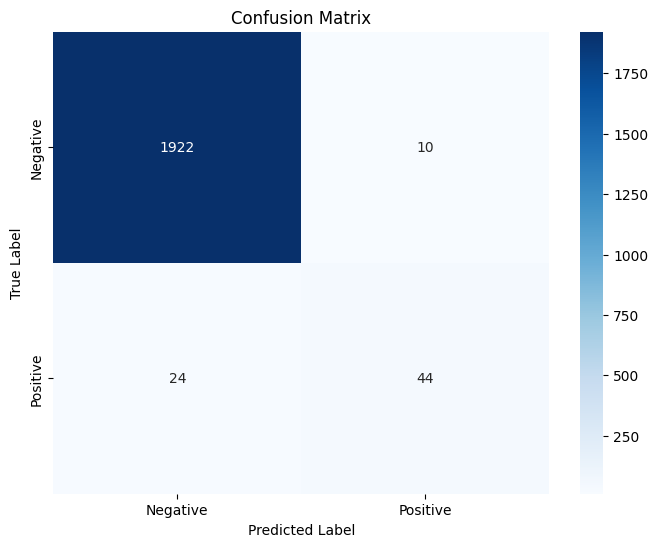

In [220]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)
# Visualization function
def plot_confusion_matrix(conf_matrix, labels=['Negative', 'Positive']):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Visualize the confusion matrix
plot_confusion_matrix(conf_matrix)

A normalized confusion matrix

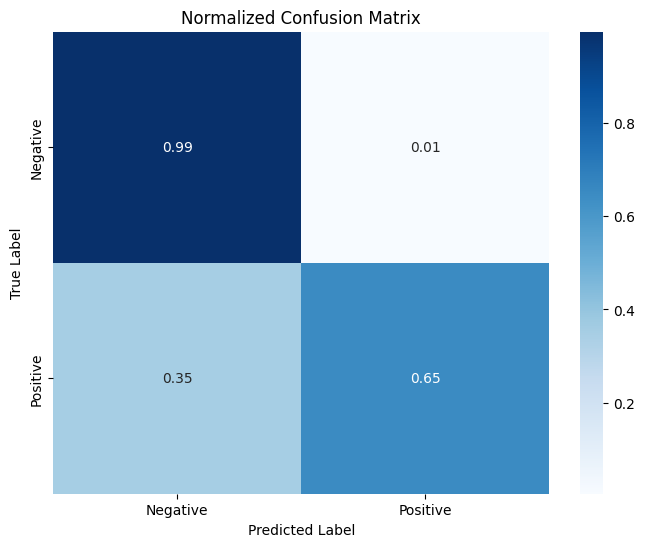

In [221]:
# Create a normalized confusion matrix visualization
cm_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Normalized Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

The next model implemented is Random Forest with bagging and feature randomness. When choosing feature randomness, the accuracy for predicting positives are better but the accuracy for detecting negatives are slightly better without feature randomness.

In [222]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Predictions

In [223]:
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]


Evaluating the Random Forest model (accuracy, precision, recall, f1-score, ROC-AUC)

In [224]:
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC AUC": roc_auc_score(y_test, y_pred_prob),
}
print(metrics)


{'Accuracy': 0.985, 'Precision': 0.8958333333333334, 'Recall': 0.6323529411764706, 'F1 Score': 0.7413793103448276, 'ROC AUC': 0.9648223419802705}


Making a PR curve to show the tradeoff between precision (positive predictive value) and recall (sensitivity) for different threshold values.
The PR curve is particularly useful for evaluating models on imbalanced datasets, where precision and recall offer more insight than the overall accuracy metric. Higher area under curve = better model

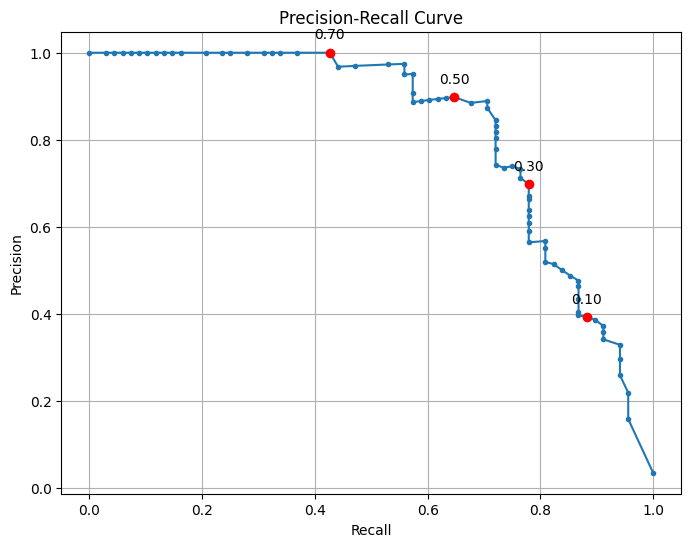

In [225]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

relevant_thresholds = [0.1, 0.3, 0.5, 0.7]

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

for threshold in relevant_thresholds:
    idx = np.argmin(np.abs(thresholds - threshold))
    plt.annotate(f'{threshold:.2f}', (recall[idx], precision[idx]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.plot(recall[idx], precision[idx], 'ro') 
plt.show()


Lower threshold = catch more machine failures but are more sensitive to catch false alerts too.
Higher threshold = fewer false alerts but might miss some machine failures

Now making a confusion matrix

In [226]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


[[1927    5]
 [  25   43]]


Feature importance. This shows how much each feature contributes to the model's decisions

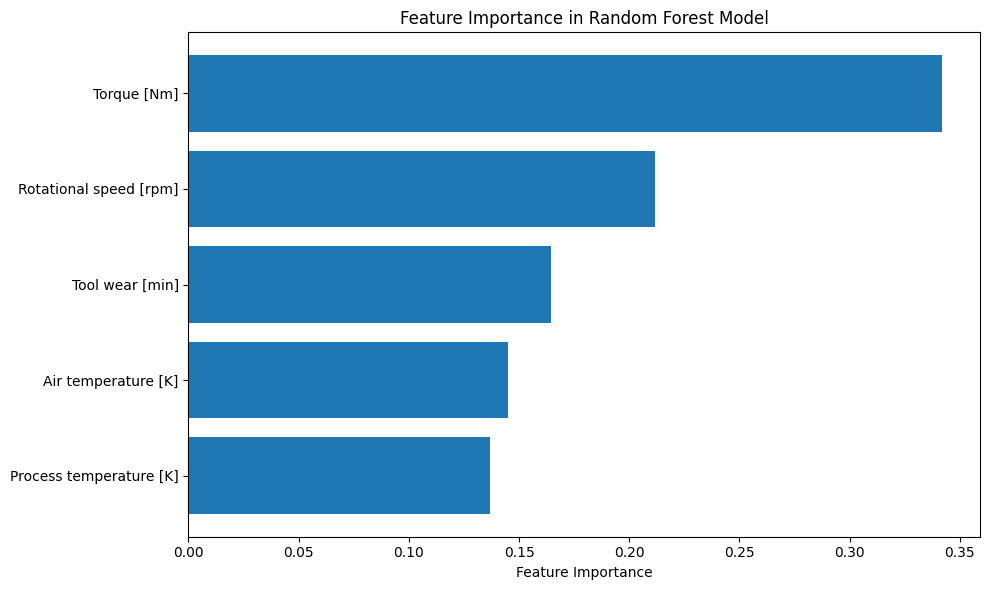

In [227]:
feature_importance = rf_model.feature_importances_
feature_names = data.drop(columns=['UDI', 'Product ID', 'Type', 'Machine failure']).columns


sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.tight_layout()
plt.show()

# Print feature importance
#print("\nFeature Importance:")
#for i in sorted_idx:
#    print(f"{feature_names[i]}: {feature_importance[i]:.4f}")

Comparing to a single decision tree

In [228]:
print("Full Random Forest Confusion Matrix: ",conf_matrix)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print(f"Single Decision Tree Accuracy: {accuracy_score(y_test, dt_pred):.4f}")
conf_matrix = confusion_matrix(y_test, dt_pred)
print("Single Decision Tree Confusion Matrix: ",conf_matrix)


Full Random Forest Confusion Matrix:  [[1927    5]
 [  25   43]]
Single Decision Tree Accuracy: 0.9780
Single Decision Tree Confusion Matrix:  [[1912   20]
 [  24   44]]


The random forest is better at predicting both negatives and positives